In [4]:
# Member 1: Dataset Collection & Import

import pandas as pd

# Load datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

print("True News Shape:", true_df.shape)
print("Fake News Shape:", fake_df.shape)

print("\nTrue News Columns:", true_df.columns)
print("Fake News Columns:", fake_df.columns)

# Add labels
true_df['label'] = "REAL"
fake_df['label'] = "FAKE"

# Combine into one dataset
data = pd.concat([true_df[['title', 'text', 'label']], fake_df[['title', 'text', 'label']]], ignore_index=True)

print("\nCombined Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

C:\Users\sriya\AppData\Local\Temp\ipykernel_19476\874107381.py:7: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df = pd.read_csv("Fake.csv")


True News Shape: (21417, 4)
Fake News Shape: (23502, 172)

True News Columns: Index(['title', 'text', 'subject', 'date'], dtype='object')
Fake News Columns: Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

Combined Dataset Shape: (44919, 3)

First 5 rows:
                                                title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text label  
0  WASHINGTON (Reuters) - The he

In [5]:
# Member 2: Data Cleaning

# Remove duplicates
before = data.shape[0]
data.drop_duplicates(inplace=True)
after = data.shape[0]

print(f"Removed {before - after} duplicate rows")

# Check missing values
print("\nMissing values per column:\n", data.isnull().sum())

# Dataset statistics
print("\nClass distribution:\n", data['label'].value_counts())

Removed 5803 duplicate rows

Missing values per column:
 title    0
text     0
label    0
dtype: int64

Class distribution:
 label
REAL    21197
FAKE    17919
Name: count, dtype: int64


In [6]:
# Member 3: Text Preprocessing

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Example before and after
example = data['text'].iloc[0]
print("\nBefore Preprocessing:\n", example[:300], "...")
print("\nAfter Preprocessing:\n", preprocess_text(example)[:300], "...")

# Apply to dataset (for demo, apply on a small sample to save time)
data['clean_text'] = data['text'].sample(2000, random_state=42).apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Before Preprocessing:
 WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way  ...

After Preprocessing:
 washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal  ...


In [7]:
# Member 4: Feature Creation

# Word count
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
# Character count
data['char_count'] = data['text'].apply(lambda x: len(str(x)))

print("\nFeature samples:\n", data[['text', 'word_count', 'char_count', 'label']].head())

# Group by label and show average values
print("\nAverage Feature Values by Class:\n", data.groupby('label')[['word_count', 'char_count']].mean())


Feature samples:
                                                 text  word_count  char_count  \
0  WASHINGTON (Reuters) - The head of a conservat...         749        4659   
1  WASHINGTON (Reuters) - Transgender people will...         624        4077   
2  WASHINGTON (Reuters) - The special counsel inv...         457        2789   
3  WASHINGTON (Reuters) - Trump campaign adviser ...         376        2461   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...         852        5204   

  label  
0  REAL  
1  REAL  
2  REAL  
3  REAL  
4  REAL  

Average Feature Values by Class:
        word_count   char_count
label                         
FAKE   413.633350  2479.632346
REAL   384.863471  2378.697646


C:\Users\sriya\AppData\Local\Temp\ipykernel_19476\1792511353.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette="Set2")


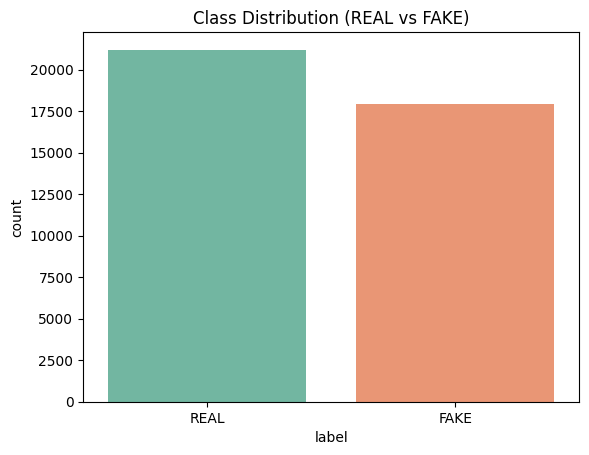

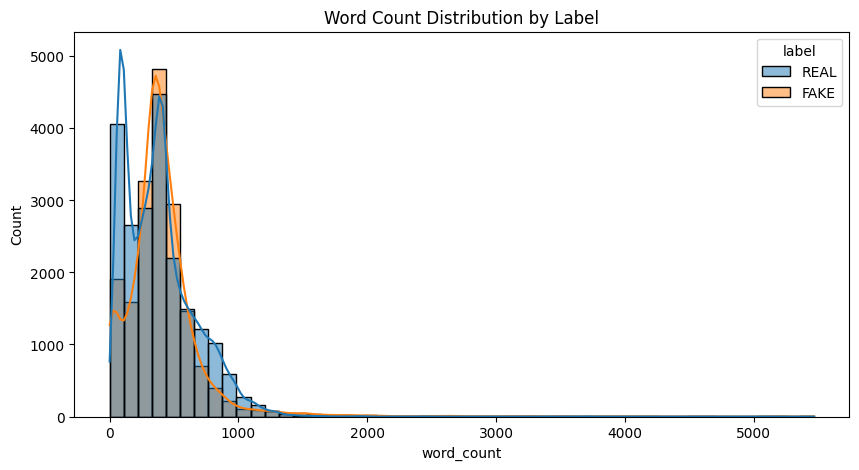

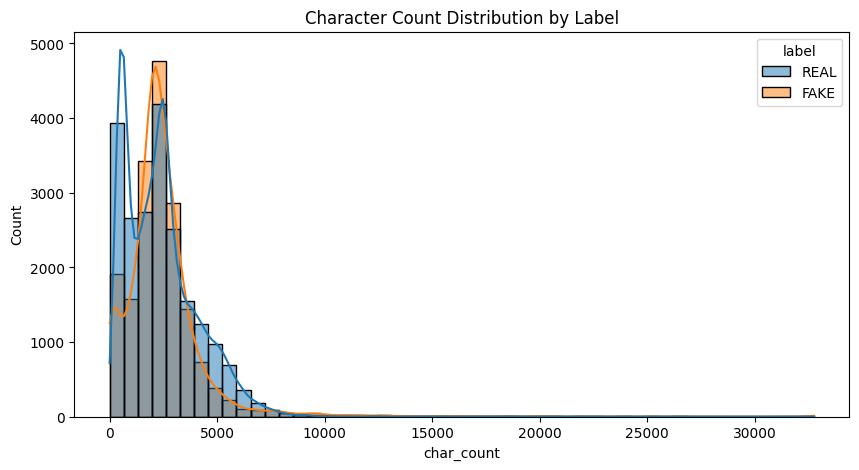

In [8]:
# Member 5: Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(data=data, x='label', palette="Set2")
plt.title("Class Distribution (REAL vs FAKE)")
plt.show()

# Histogram: Word count
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='word_count', hue='label', bins=50, kde=True)
plt.title("Word Count Distribution by Label")
plt.show()

# Histogram: Char count
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='char_count', hue='label', bins=50, kde=True)
plt.title("Character Count Distribution by Label")
plt.show()

C:\Users\sriya\AppData\Local\Temp\ipykernel_19476\418958859.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="word", data=real_top, ax=ax[0], palette="Blues_d")
C:\Users\sriya\AppData\Local\Temp\ipykernel_19476\418958859.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="score", y="word", data=fake_top, ax=ax[1], palette="Reds_d")


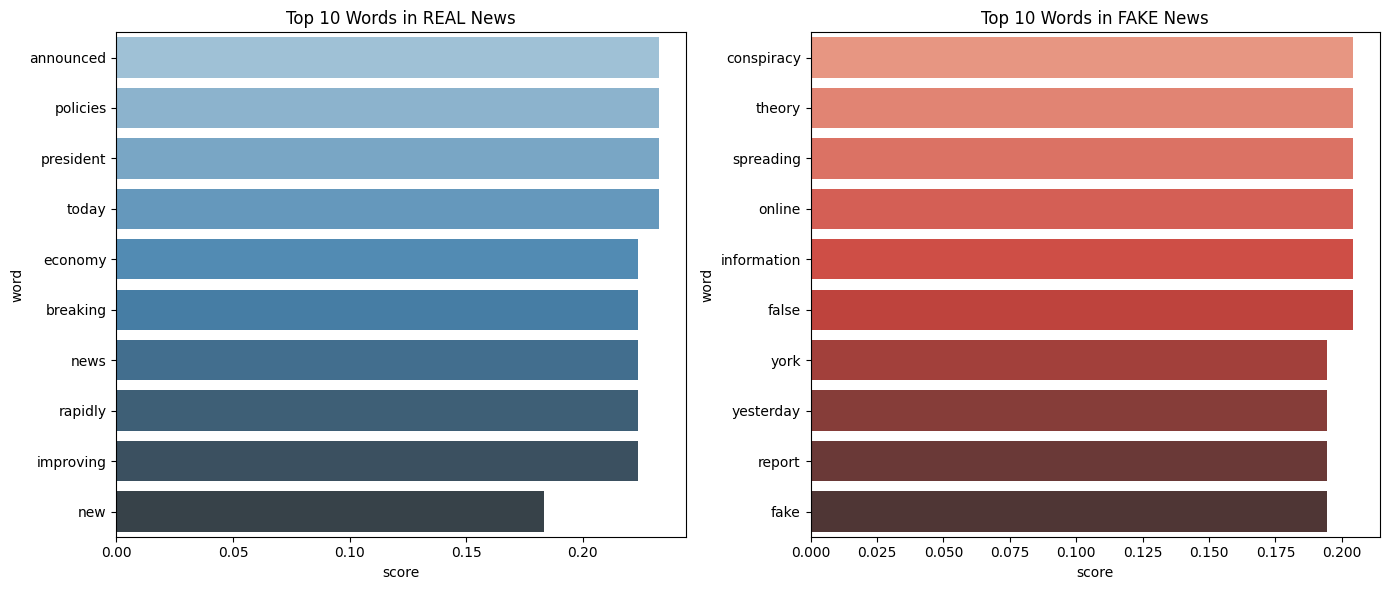

In [10]:
# Member 6: Visualization of Text Patterns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# ----------------------------------------------------------
# STEP 1: Load your dataset
# ----------------------------------------------------------
# If you already have a CSV dataset:
# data = pd.read_csv("news_dataset.csv")   # replace with your file path

# For demo/testing (so code works even without a CSV):
data = pd.DataFrame({
    "text": [
        "Breaking news! The economy is improving rapidly.",
        "Fake report: Aliens landed in New York yesterday.",
        "The president announced new policies today.",
        "Conspiracy theory spreading false information online."
    ],
    "label": ["REAL", "FAKE", "REAL", "FAKE"]
})

# ----------------------------------------------------------
# STEP 2: Use TF-IDF on a safe sample
# ----------------------------------------------------------
sample_size = min(5000, len(data))  # avoid errors if dataset < 5000
sample_data = data.sample(sample_size, random_state=42)

tfidf = TfidfVectorizer(max_features=1000, stop_words="english")
tfidf_matrix = tfidf.fit_transform(sample_data["text"])
feature_names = tfidf.get_feature_names_out()

# ----------------------------------------------------------
# STEP 3: Average TF-IDF scores per class
# ----------------------------------------------------------
real_idx = sample_data["label"] == "REAL"
fake_idx = sample_data["label"] == "FAKE"

real_mean = tfidf_matrix[real_idx.to_numpy()].mean(axis=0).A1
fake_mean = tfidf_matrix[fake_idx.to_numpy()].mean(axis=0).A1

# ----------------------------------------------------------
# STEP 4: Top 10 words for each class
# ----------------------------------------------------------
real_top = (
    pd.DataFrame({"word": feature_names, "score": real_mean})
    .sort_values(by="score", ascending=False)
    .head(10)
)

fake_top = (
    pd.DataFrame({"word": feature_names, "score": fake_mean})
    .sort_values(by="score", ascending=False)
    .head(10)
)

# ----------------------------------------------------------
# STEP 5: Plot
# ----------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="score", y="word", data=real_top, ax=ax[0], palette="Blues_d")
ax[0].set_title("Top 10 Words in REAL News")

sns.barplot(x="score", y="word", data=fake_top, ax=ax[1], palette="Reds_d")
ax[1].set_title("Top 10 Words in FAKE News")

plt.tight_layout()
plt.show()


In [13]:
# Apply preprocessing to the entire dataset
print("Preprocessing full dataset... this may take a few minutes ⏳")

data['clean_text'] = data['text'].astype(str).apply(preprocess_text)

# Save the preprocessed dataset to CSV
output_file = "preprocessed_news.csv"
data.to_csv(output_file, index=False)

print(f"\n Preprocessed dataset saved as '{output_file}'")
print("\nColumns in saved dataset:", list(data.columns))

# Safe preview (only show columns that exist)
preview_cols = [col for col in ['title', 'text', 'clean_text', 'label'] if col in data.columns]
print("\nPreview:\n", data[preview_cols].head())


Preprocessing full dataset... this may take a few minutes ⏳

Preprocessed dataset saved as 'preprocessed_news.csv'

Columns in saved dataset: ['text', 'label', 'clean_text']

Preview:
                                                 text  \
0   Breaking news! The economy is improving rapidly.   
1  Fake report: Aliens landed in New York yesterday.   
2        The president announced new policies today.   
3  Conspiracy theory spreading false information ...   

                                          clean_text label  
0            breaking news economy improving rapidly  REAL  
1       fake report aliens landed new york yesterday  FAKE  
2             president announced new policies today  REAL  
3  conspiracy theory spreading false information ...  FAKE  


In [15]:
output_file = "preprocessed_news.csv"
data.to_csv(output_file, index=False)
